### Import necessary libraries

In [1]:
# import necessary libraries
from skimage.external import tifffile
from scipy.ndimage import label
from matplotlib import pyplot as plt
from scipy.spatial import KDTree
import pandas as pd
import scipy.ndimage as ndi
import glob
import h5py
import os
import numpy as np
import dabest

#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob

print("We're using DABEST v{}".format(dabest.__version__))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We're using DABEST v0.2.7


### Graph generation

In [2]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [3]:
file = '190708_A549-mCh_Tb_D7_1D11iv_01x32_2_590_pCG_p50d2.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190708_1D11/190809_1D11dist/"

#change directory
os.chdir(csvdir)
#make dataframe 
df1 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df1.loc[df1['0']>=0, '0'] = 1

#save csv file
df1.to_csv( filename, index=False, float_format='%.2f' )
print (df1)

        0          1       2       3       4
0     1.0    1555.26  164.18  454.55  400.90
1     1.0   98396.12   46.66   20.54   19.98
2     1.0   19388.91   24.84   32.96   31.40
3     1.0  120895.54   17.33   12.56   57.78
4     1.0   12338.40    4.33  126.21   37.60
...   ...        ...     ...     ...     ...
9785  1.0     207.37    5.25   37.63  103.52
9786  1.0     622.10  102.26  109.51   79.32
9787  1.0    1036.84   12.64   77.27   28.09
9788  1.0     311.05   18.48   16.12   47.47
9789  1.0     207.37   57.11  509.86  151.64

[9790 rows x 5 columns]


In [4]:
file = '190708_A549-mCh_Tb_D7_1D11iv_02x32_590_pCG_p50d2.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190708_1D11/190809_1D11dist/"

#change directory
os.chdir(csvdir)
#make dataframe 
df2 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df2.loc[df2['0']>=0, '0'] = 2

#save csv file
df2.to_csv( filename, index=False, float_format='%.2f' )
print (df2)

         0          1       2       3       4
0      2.0  145987.07   10.56    5.17  175.43
1      2.0    3939.99   27.85    3.69  184.16
2      2.0    3836.31   83.75  106.00  109.91
3      2.0   21358.90   43.06  152.50  148.84
4      2.0  111667.67   15.58    4.17   83.68
...    ...        ...     ...     ...     ...
14543  2.0     103.68    4.70   11.97  155.00
14544  2.0     103.68  173.44  476.98  212.63
14545  2.0     933.16    3.63    1.46  241.06
14546  2.0    2384.73    1.94   92.87  207.32
14547  2.0     414.74   64.79  366.67  169.74

[14548 rows x 5 columns]


In [5]:
file = '190708_A549-mCh_Tb_D7_1D11iv_03x32_590_pCG_p50d2.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190708_1D11/190809_1D11dist/"

#change directory
os.chdir(csvdir)
#make dataframe 
df3 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df3.loc[df3['0']>=0, '0'] = 3

#save csv file
df3.to_csv( filename, index=False, float_format='%.2f' )
print (df3)

         0         1      2       3       4
0      3.0   6532.09   6.35    2.42  100.73
1      3.0    829.47   7.35  237.04   87.74
2      3.0    518.42   9.55  228.75   96.24
3      3.0  11301.56  26.52  155.98   65.12
4      3.0   7050.51   5.22  117.72   63.46
...    ...       ...    ...     ...     ...
14018  3.0    103.68   0.00   95.85  193.02
14019  3.0    311.05   0.00   75.53  211.36
14020  3.0    103.68  33.86  154.70  129.85
14021  3.0    103.68  32.70   20.19  144.14
14022  3.0   1036.84  43.35    2.42  170.39

[14023 rows x 5 columns]


In [6]:
file = '190708_A549-mCh_Tb_D7_MsIgGiv_04x32_590_pCG_p50d2.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190708_1D11/190809_1D11dist/"

#change directory
os.chdir(csvdir)
#make dataframe 
df4 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df4.loc[df4['0']>=0, '0'] = 4

#save csv file
df4.to_csv( filename, index=False, float_format='%.2f' )
print (df4)

         0         1       2       3       4
0      4.0   3525.26  132.42  473.12  275.25
1      4.0  15345.23   14.74  204.51  201.76
2      4.0  17418.91   15.71  124.27  163.16
3      4.0  63765.66   11.42  269.73  225.00
4      4.0  51945.68    1.71   15.52  357.54
...    ...       ...     ...     ...     ...
20248  4.0    103.68   50.55   30.73  241.27
20249  4.0    103.68   27.83   58.08  191.18
20250  4.0    103.68   54.56  163.33   85.03
20251  4.0    103.68   61.85  162.42   86.89
20252  4.0   2177.36    9.32   47.55  175.96

[20253 rows x 5 columns]


In [7]:
file = '190708_A549-mCh_Tb_D7_MsIgGiv_05x32_590_pCG_p50d2.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190708_1D11/190809_1D11dist/"

#change directory
os.chdir(csvdir)
#make dataframe 
df5 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df5.loc[df5['0']>=0, '0'] = 5

#save csv file
df5.to_csv( filename, index=False, float_format='%.2f' )
print (df5)

         0         1      2       3       4
0      5.0  28409.42  12.71  339.59  291.92
1      5.0  30586.78  13.43    4.44  233.33
2      5.0   5080.52  69.06  356.52   54.99
3      5.0   8294.72   3.52  162.20   73.02
4      5.0  24676.79  25.90  260.82  193.07
...    ...       ...    ...     ...     ...
19315  5.0    103.68  34.45    3.32  121.76
19316  5.0   1036.84  12.97  195.09  192.39
19317  5.0    103.68   0.00   78.55  125.18
19318  5.0    414.74  17.59  148.26  486.99
19319  5.0    311.05  55.50  182.95  454.97

[19320 rows x 5 columns]


In [8]:
file = '190708_A549-mCh_Tb_D7_MsIgGiv_06x32_590_pCG_p50d2.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190708_1D11/190809_1D11dist/"

#change directory
os.chdir(csvdir)
#make dataframe 
df6 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df6.loc[df6['0']>=0, '0'] = 6

#save csv file
df6.to_csv( filename, index=False, float_format='%.2f' )
print (df6)

         0         1      2       3       4
0      6.0  15863.65  23.89  177.36  548.99
1      6.0   3628.94  33.23  192.81  637.15
2      6.0  23847.32  16.10    8.44  401.52
3      6.0   2384.73   8.23  146.18  608.07
4      6.0   2281.05   1.69  209.39  369.11
...    ...       ...    ...     ...     ...
15140  6.0    518.42  27.81  112.08  115.75
15141  6.0    311.05  78.92  114.62  123.86
15142  6.0   4147.36  27.05  315.24  462.12
15143  6.0    414.74   2.35  536.71  258.17
15144  6.0    518.42  70.34  519.09  913.43

[15145 rows x 5 columns]


In [9]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
#クラスタリングに必要なライブラリ
from sklearn.cluster import KMeans

In [30]:
# Define root diretory
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190708_1D11/190809_1D11dist/"

df_sum1 = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)

# make csv file
filename = '191210_A549-mCh_Tb_D7_1D11_sum1.csv'

#save csv file
df_sum1.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum1)

df11 = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df12 = pd.concat([df4, df5, df6], axis=0, ignore_index=True)

#df_sum2 = pd.concat([df41, df42, df43, df44, df45, df46, df47, df48, df49, df50], axis=1)
df_sum3 = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df_sum4 = pd.concat([df11, df12], axis=1)

#print(df_sumCon)

# make csv file
filename = "191210_A549-mCh_Tb_D7_1D11_sum2.csv"

#save csv file
#df_sum2.to_csv( filename, index=False, float_format='%.2f' )
#print (df_sum2)


# make csv file
filename = "191210_A549-mCh_Tb_D7_1D11_sum3.csv"

#save csv file
df_sum3.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum3)

# make csv file
filename = "191210_A549-mCh_Tb_D7_1D11_sum4.csv"

#save csv file
df_sum4.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum4)

         0          1       2       3       4
0      1.0    1555.26  164.18  454.55  400.90
1      1.0   98396.12   46.66   20.54   19.98
2      1.0   19388.91   24.84   32.96   31.40
3      1.0  120895.54   17.33   12.56   57.78
4      1.0   12338.40    4.33  126.21   37.60
...    ...        ...     ...     ...     ...
15140  6.0     518.42   27.81  112.08  115.75
15141  6.0     311.05   78.92  114.62  123.86
15142  6.0    4147.36   27.05  315.24  462.12
15143  6.0     414.74    2.35  536.71  258.17
15144  6.0     518.42   70.34  519.09  913.43

[93079 rows x 5 columns]
         0          1       2       3       4    0          1      2       3  \
0      1.0    1555.26  164.18  454.55  400.90  2.0  145987.07  10.56    5.17   
1      1.0   98396.12   46.66   20.54   19.98  2.0    3939.99  27.85    3.69   
2      1.0   19388.91   24.84   32.96   31.40  2.0    3836.31  83.75  106.00   
3      1.0  120895.54   17.33   12.56   57.78  2.0   21358.90  43.06  152.50   
4      1.0   12338.40 

     0          1       2       3       4
0  1.0    1555.26  164.18  454.55  400.90
1  1.0   98396.12   46.66   20.54   19.98
2  1.0   19388.91   24.84   32.96   31.40
3  1.0  120895.54   17.33   12.56   57.78
4  1.0   12338.40    4.33  126.21   37.60
0    float64
1    float64
2    float64
3    float64
4    float64
dtype: object


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


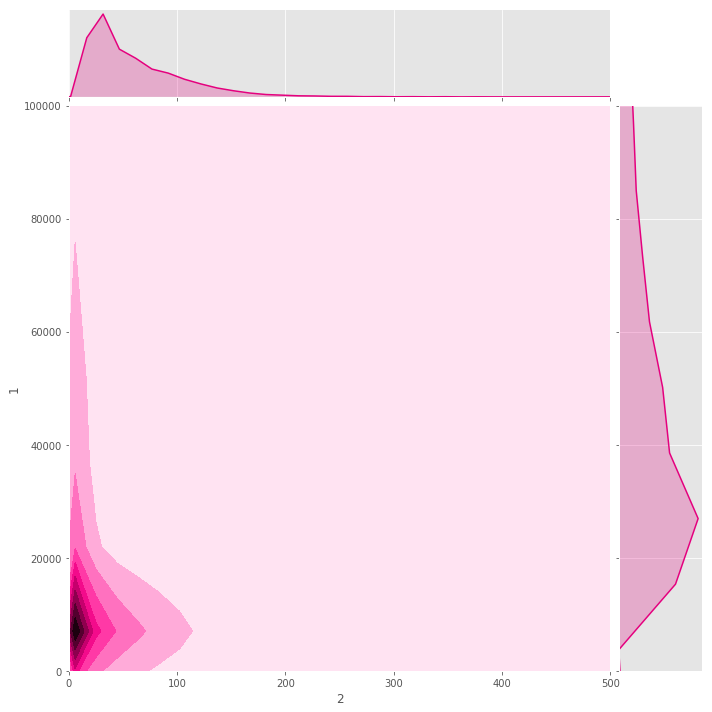

In [32]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df11.head())
print (df11.dtypes)


#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('2', '1', data=df11, kind="kde", color='#E4007E', stat_func = None,
               size=10, ratio=6, space=0.1, xlim=(0,500), ylim=(0, 100000))

plt.savefig('191210_A549-mCh_Tb_D7_1D11_jointplot01.png')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_jointplot01.pdf')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_jointplot01.eps')

     0          1       2       3       4
0  1.0    1555.26  164.18  454.55  400.90
1  1.0   98396.12   46.66   20.54   19.98
2  1.0   19388.91   24.84   32.96   31.40
3  1.0  120895.54   17.33   12.56   57.78
4  1.0   12338.40    4.33  126.21   37.60
0    float64
1    float64
2    float64
3    float64
4    float64
dtype: object


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


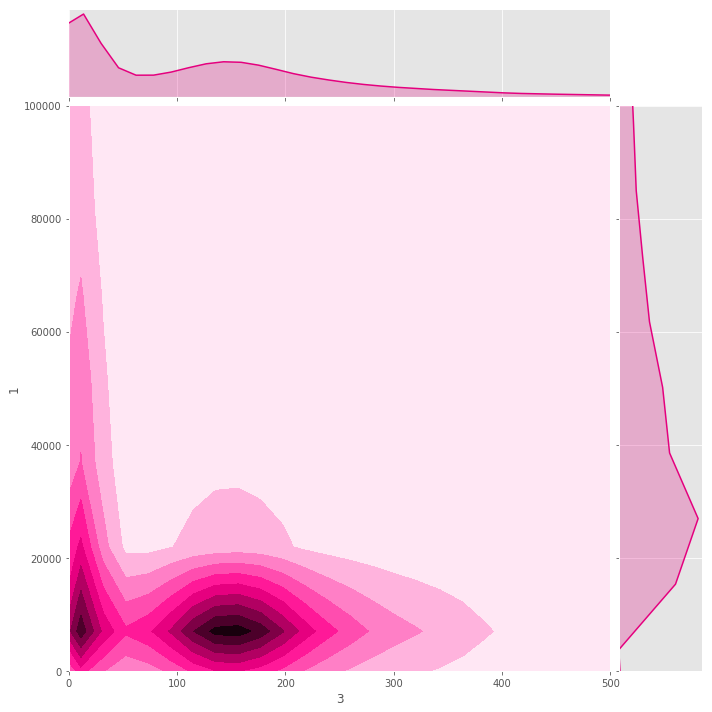

In [31]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df11.head())
print (df11.dtypes)


#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('3', '1', data=df11, kind="kde", color='#E4007E',
               size=10, ratio=6, space=0.1, xlim=(0,500), ylim=(0, 100000), stat_func = None)

plt.savefig('191210_A549-mCh_Tb_D7_1D11_jointplot02.png')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_jointplot02.pdf')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_jointplot02.eps')

     0          1       2       3       4
0  1.0    1555.26  164.18  454.55  400.90
1  1.0   98396.12   46.66   20.54   19.98
2  1.0   19388.91   24.84   32.96   31.40
3  1.0  120895.54   17.33   12.56   57.78
4  1.0   12338.40    4.33  126.21   37.60
0    float64
1    float64
2    float64
3    float64
4    float64
dtype: object


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


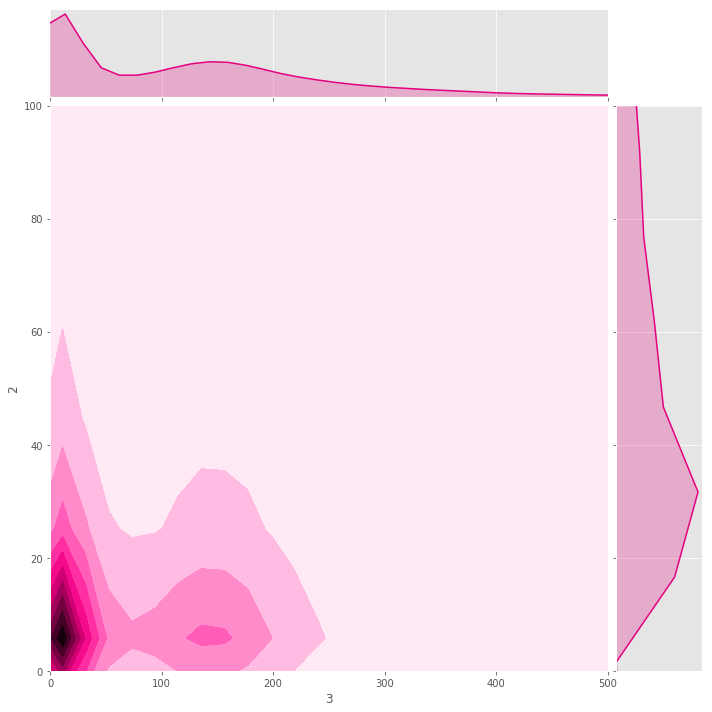

In [33]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

print (df11.head())
print (df11.dtypes)


#sns.pairplot(df22, hue='0', palette='summer', plot_kws={'alpha':0.2},size=10,
#             vars=['1', '2', '3', '4'], diag_kind='kde')

sns.jointplot('3', '2', data=df11, kind="kde", color='#E4007E', stat_func = None,
               size=10, ratio=6, space=0.1, xlim=(0,500), ylim=(0, 100))

plt.savefig('191210_A549-mCh_Tb_D7_1D11_jointplot03.png')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_jointplot03.pdf')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_jointplot03.eps')

In [27]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

#おまじない
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


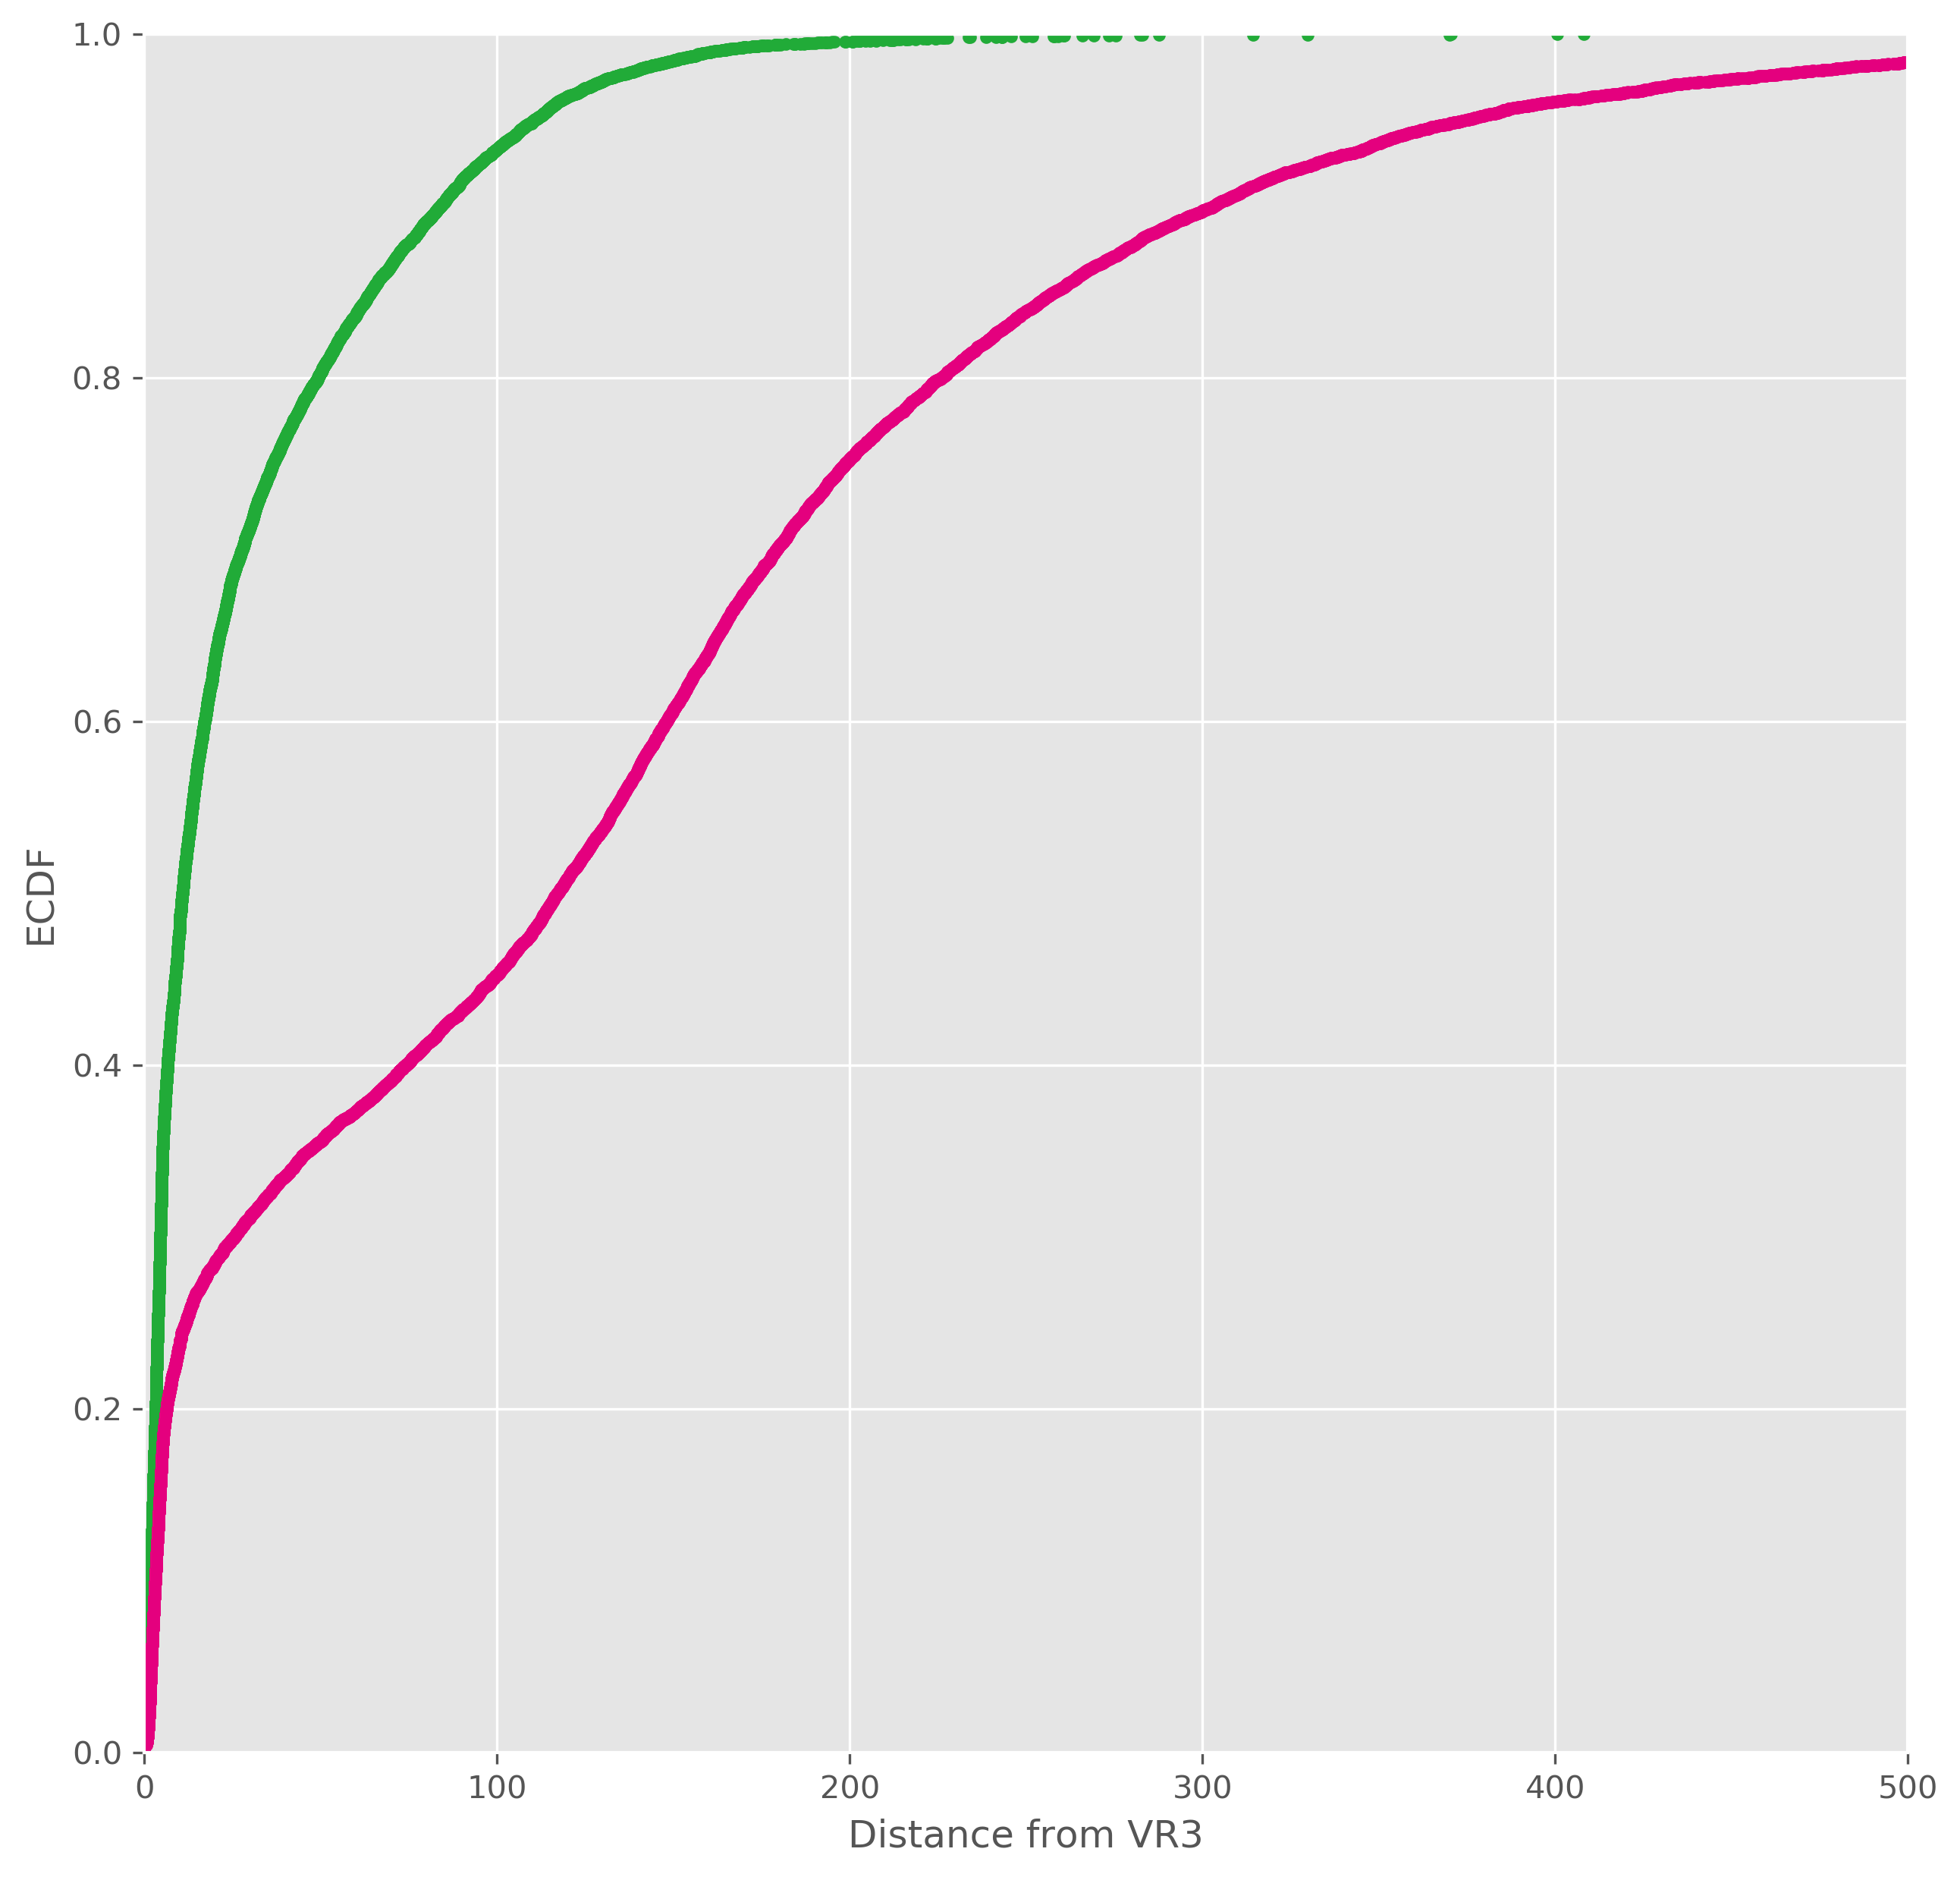

In [34]:
#making an ECDF
import matplotlib.pyplot as plt
import numpy as np

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(10, 10), dpi=300)

x2 = np.sort(df3["2"])
y2 = np.arange(1, len(x2)+1)/len(x2)
_ = plt.plot(x2, y2, color="#21AB38", marker='.', linestyle='none')
_ = plt.xlabel('Distance from SMA')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.axis([0, 500, 0, 1])

x3 = np.sort(df3["3"])
y3 = np.arange(1, len(x3)+1)/len(x3)
_ = plt.plot(x3, y3, color="#E4007E", marker='.', linestyle='none')
_ = plt.xlabel('Distance from VR3')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.axis([0, 500, 0, 1])


plt.show

plt.savefig('191210_A549-mCh_Tb_D7_1D11_ECDF01.pdf')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_ECDF01.eps')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_ECDF01.png')